[*********************100%***********************]  1 of 1 completed


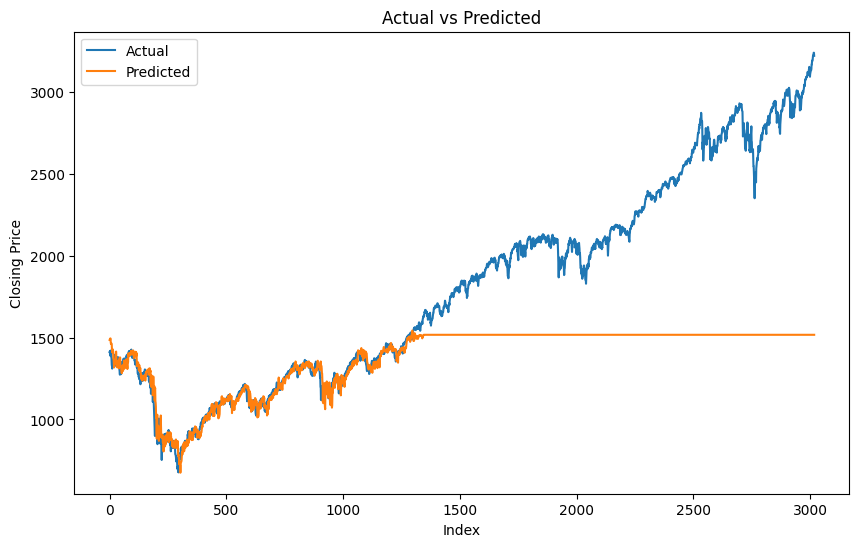

Mean squared error:  435066.663365209
Mean absolute error:  449.2044451281408
R² score:  -0.07950103939681652


In [3]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

TRAIN_START_DATE = '1960-01-01'
TRAIN_END_DATE = '2015-12-31'
PREDICT_START_DATE = '2016-01-01'
PREDICT_END_DATE = '2019-12-31'

advDays = 7
prevDays = 6
split_ratio = 0.8

# Download S&P 500 Index data from Yahoo Finance using yfinance
sp500 = yf.download('^GSPC', start=TRAIN_START_DATE, end=PREDICT_END_DATE)

# Create features and target variables
features = []
targets = []

for i in range(prevDays, len(sp500) - advDays):
    prev_days = sp500['Close'][i - prevDays:i].values.tolist()
    target = sp500['Close'][i + advDays]
    features.append(prev_days)
    targets.append(target)

X = features
y = targets

# Split dataset into training and testing sets
split_idx = int(len(X) * split_ratio)

X_train = X[:split_idx]
y_train = y[:split_idx]

X_test = X[split_idx:]
y_test = y[split_idx:]

# Define random forest regression model
model = RandomForestRegressor(n_estimators=100, criterion='squared_error')

# Train model
model.fit(X_train, y_train)


# Make predictions on test set
y_pred = model.predict(X_test)



# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)

r2Score = r2_score(y_test, y_pred)
print("R² score: ", r2Score)